In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils

/home/libfun/vrt/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [3]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [4]:
old_features = {'Electron': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [5]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

In [6]:
target = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
target[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [7]:
target = np.abs(train.MCParticleType.values)

target_m = np.zeros(target.shape)
target_m[target == pid_dict['Ghost']] = 0*np.ones((target == pid_dict['Ghost']).sum())
target_m[target == pid_dict['Muon']] = 1*np.ones((target == pid_dict['Muon']).sum())
target_m[target == pid_dict['Pion']] = 2*np.ones((target == pid_dict['Pion']).sum())
target_m[target == pid_dict['Kaon']] = 3*np.ones((target == pid_dict['Kaon']).sum())
target_m[target == pid_dict['Proton']] = 4*np.ones((target == pid_dict['Proton']).sum())
target_m[target == pid_dict['Electron']] = 5*np.ones((target == pid_dict['Electron']).sum())

y_train = target_m.copy()

y_test = np.abs(test.MCParticleType.values)

target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0*np.ones((y_test == pid_dict['Ghost']).sum())
target_m[y_test == pid_dict['Muon']] = 1*np.ones((y_test == pid_dict['Muon']).sum())
target_m[y_test == pid_dict['Pion']] = 2*np.ones((y_test == pid_dict['Pion']).sum())
target_m[y_test == pid_dict['Kaon']] = 3*np.ones((y_test == pid_dict['Kaon']).sum())
target_m[y_test == pid_dict['Proton']] = 4*np.ones((y_test == pid_dict['Proton']).sum())
target_m[y_test == pid_dict['Electron']] = 5*np.ones((y_test == pid_dict['Electron']).sum())

y_test = target_m.copy()

In [8]:
feat_uni = set(old_features['Electron'])
for v in old_features.values():
    k = set(v)
    feat_uni = feat_uni.union(k)
    
feat_uni = list(feat_uni)

In [9]:
ndict = {'Ghost': 0, 'Muon': 1, 'Pion': 2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}

train_w = np.ones(train.shape[0])
for p in ndict.keys():
    pw = train.shape[0]/(y_train == ndict[p]).sum()
    train_w[y_train == ndict[p]] *= pw
    
test_w = np.ones(test.shape[0])
for p in ndict.keys():
    pw = test.shape[0]/(y_test == ndict[p]).sum()
    test_w[y_test == ndict[p]] *= pw

dtrain = xgb.DMatrix(train[feat_uni], label=y_train, feature_names=feat_uni, weight=train_w)
dtest = xgb.DMatrix(test[feat_uni], feature_names=feat_uni)    

In [10]:
params = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .2,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'multi:softprob',
    'seed': 42, 
    'silent': 0,
    'eval_metric': 'mlogloss',
    'num_class': 6
}

In [11]:
gbm = xgb.train(params, dtrain, num_boost_round=65, verbose_eval=False)

In [12]:
preds = gbm.predict(dtest)

In [13]:
preds.shape

(1000000, 6)

In [14]:
label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

In [15]:
preds.max()

0.99996865

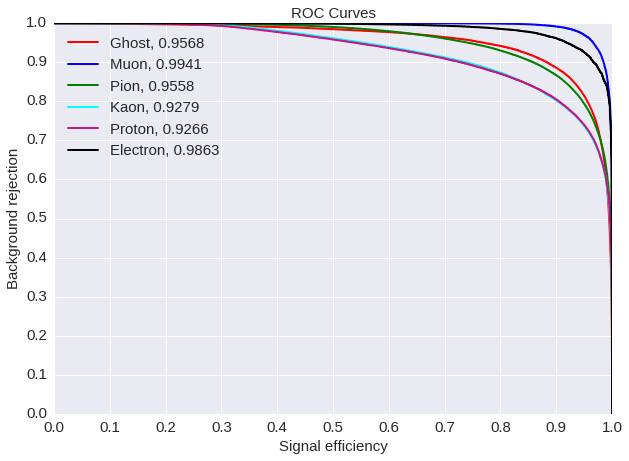

In [16]:
utils.get_roc_curves(y_test, preds, label_list)

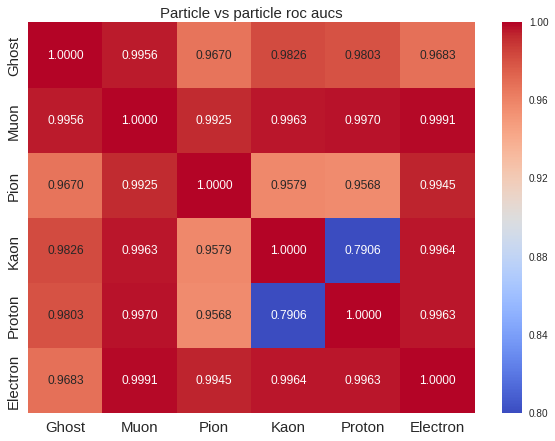

In [17]:
mat = utils.get_roc_auc_matrix(y_test, preds, label_list)

In [18]:
mat2 = pd.read_csv('./PID/python/class_vs_class_roc_auc_matrix_baseline.csv', index_col='Unnamed: 0')

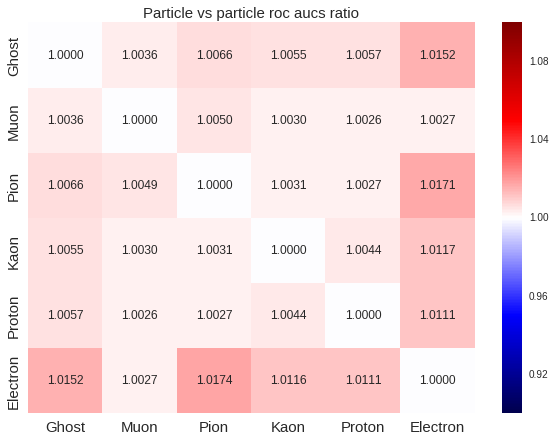

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,1.003569,1.006595,1.005505,1.005701,1.015231
Muon,1.003569,1.000000,1.004954,1.002960,1.002591,1.002703
Pion,1.006595,1.004928,1.000000,1.003075,1.002716,1.017072
Kaon,1.005505,1.002960,1.003075,1.000000,1.004361,1.011676
Proton,1.005701,1.002591,1.002715,1.004361,1.000000,1.011085
Electron,1.015232,1.002706,1.017406,1.011643,1.011089,1.000000


In [19]:
utils.get_roc_auc_ratio_matrix(mat, mat2)

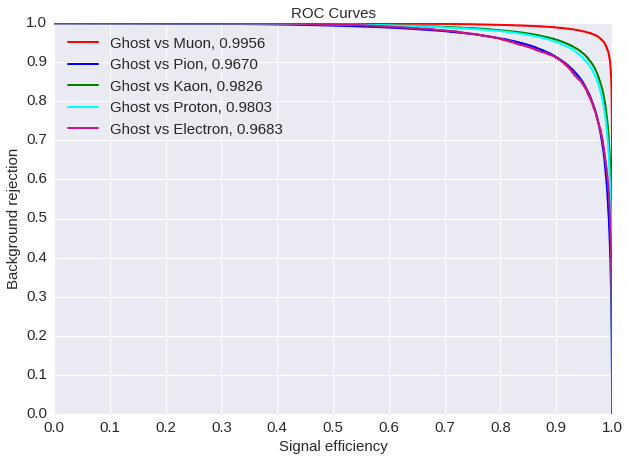

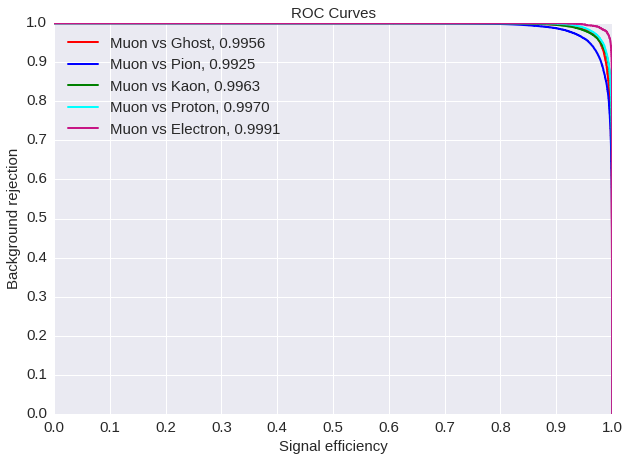

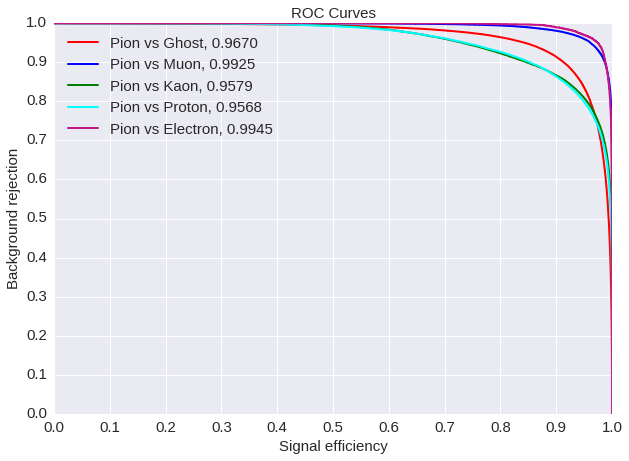

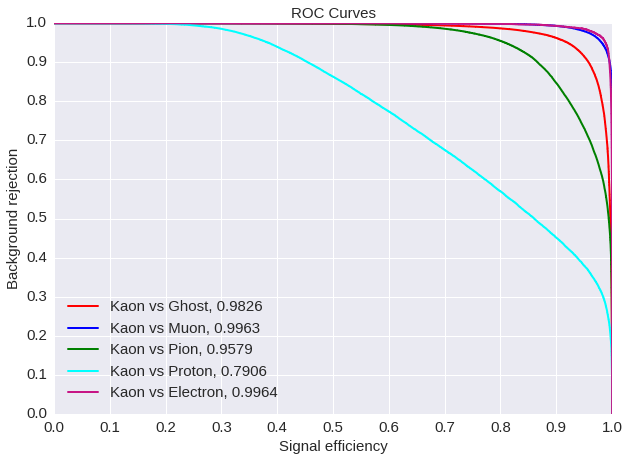

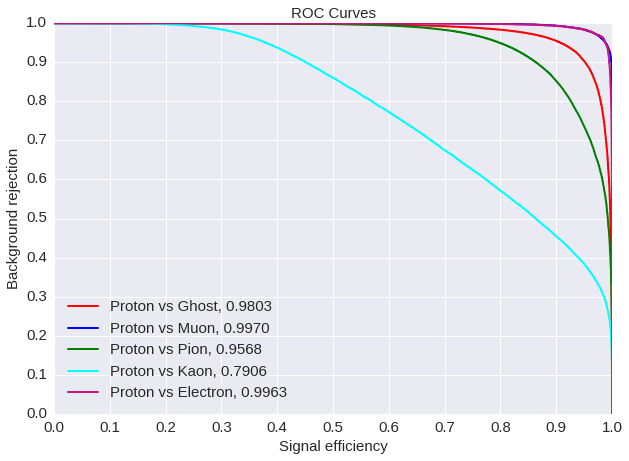

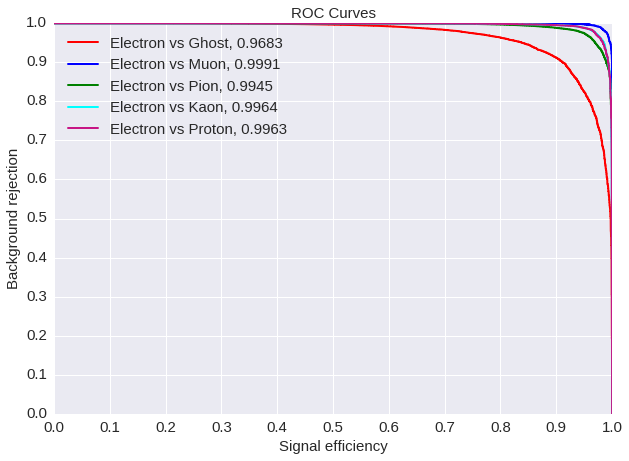

In [20]:
utils.get_one_vs_one_roc_curves(target_m, preds, label_list)

In [21]:
fl = utils.get_flatness_table(test, target_m, preds, label_list)

In [22]:
fl

,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.004537,0.015632,0.000866,0.000864
Muon,0.031504,0.048033,0.000918,0.000892
Pion,0.017878,0.015307,0.000848,0.000850
Kaon,0.047881,0.033163,0.000872,0.000867
Proton,0.038141,0.045432,0.000888,0.000892
Electron,0.007979,0.032298,0.000956,0.000977


In [23]:
flatness_baseline = pd.read_csv("./PID/python/flatness_baseline.csv", index_col=0)
utils.get_flatness_ratio(fl, flatness_baseline)

,TrackP,TrackPt
Ghost,0.688423,1.101838
Muon,1.545235,1.067622
Pion,1.082745,1.114934
Kaon,1.111608,0.904671
Proton,1.101320,1.019316
Electron,1.218913,1.948093


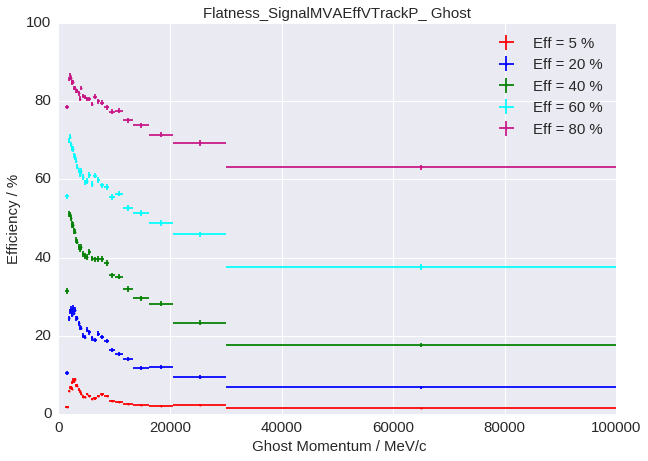

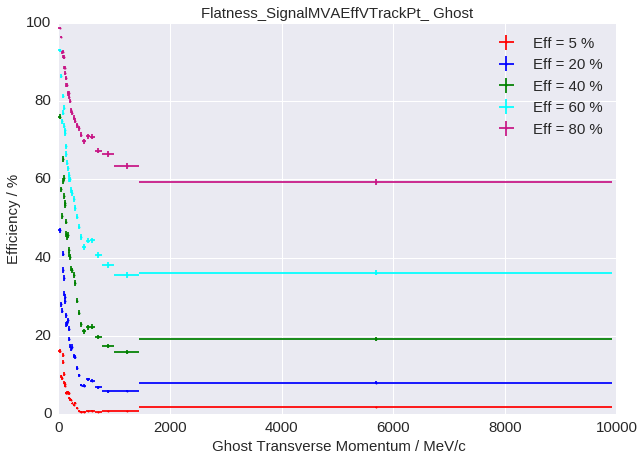

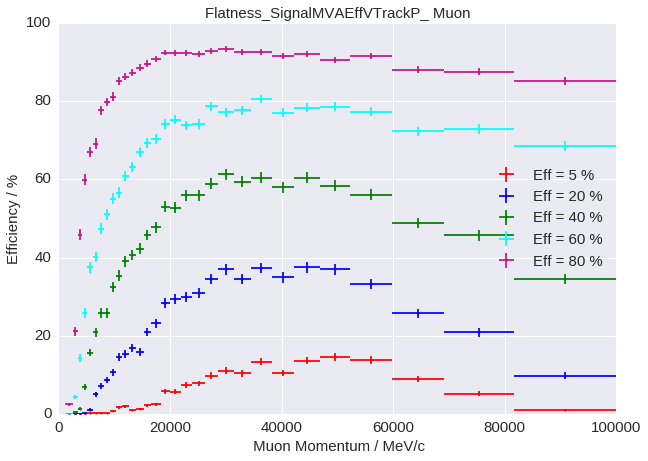

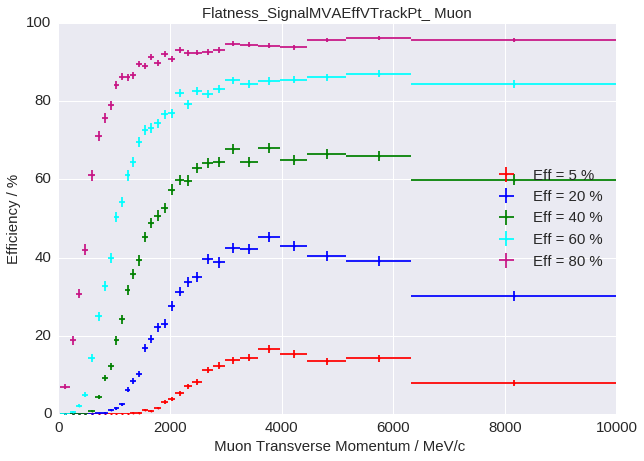

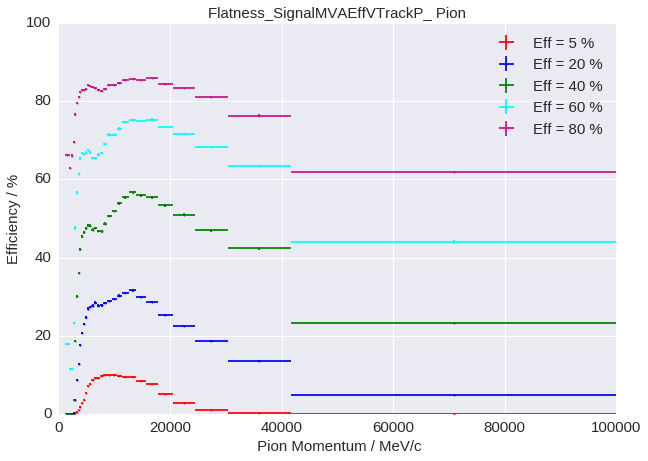

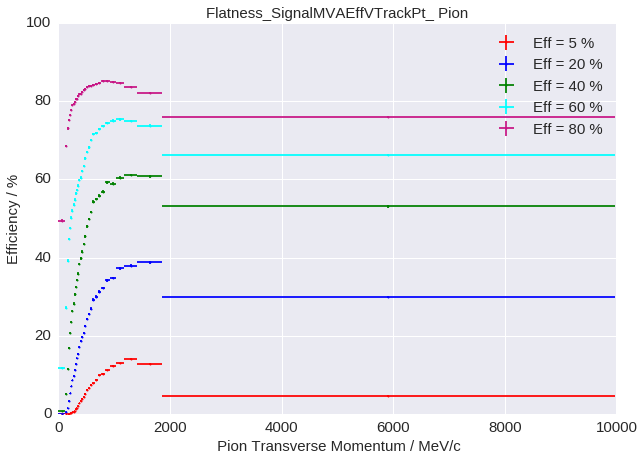

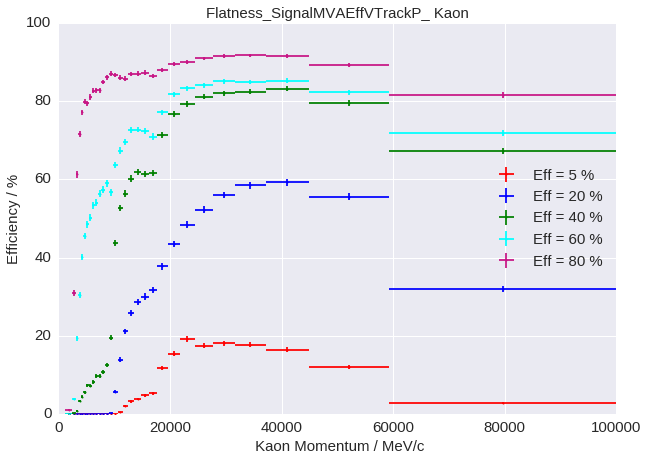

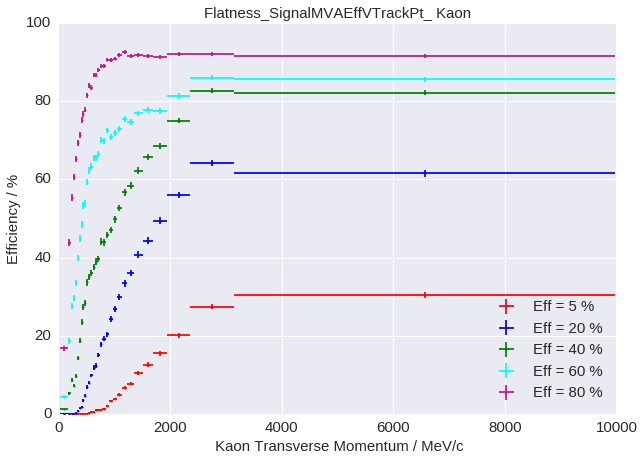

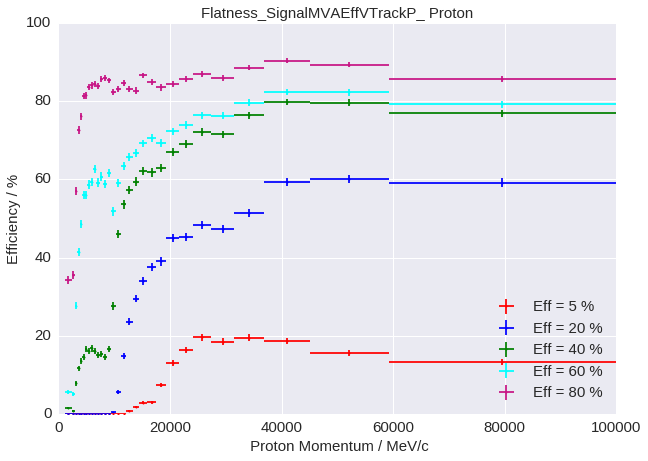

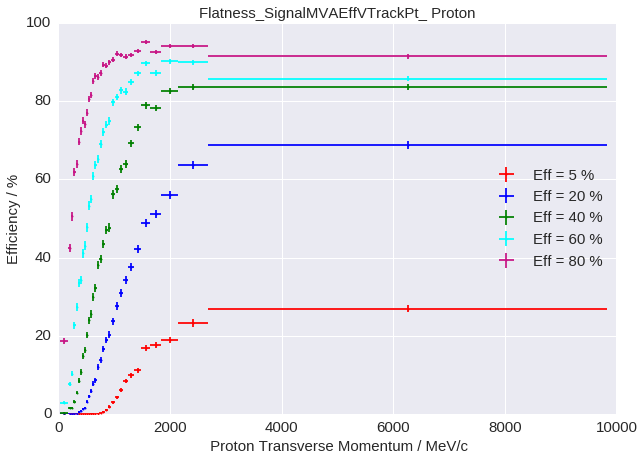

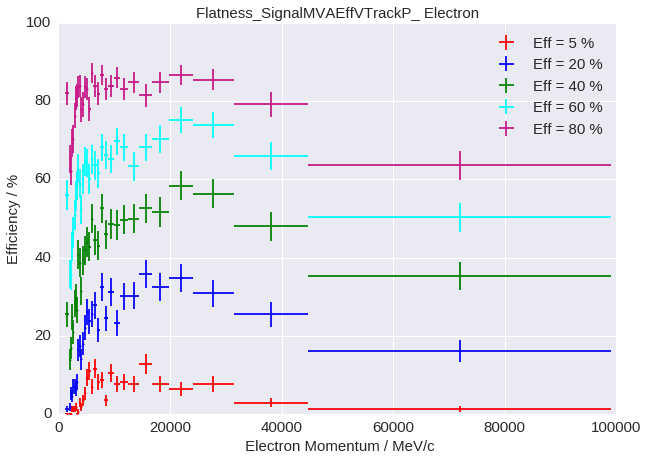

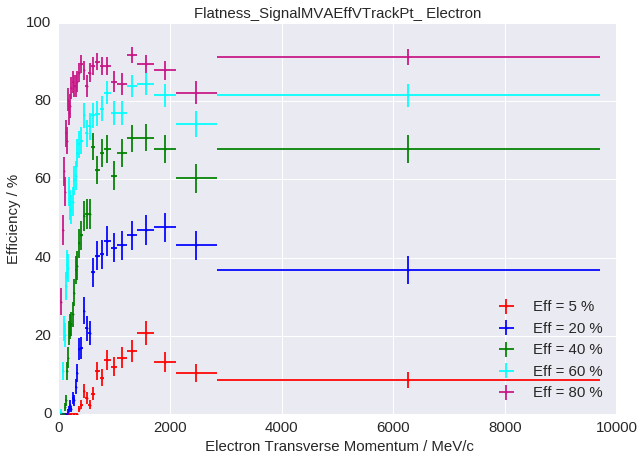

In [24]:
utils.get_all_flatness_figures(test, preds, target_m, '', label_list, show=True)

In [25]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0

for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Logloss:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

Avg. pairwise ROC AUC: 0.971400092288
Logloss: 0.652244932967
Mean flatness: 0.0281487791297
